# **CONVOLUTION NEURAL NETWORK ON FASHION MINST**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers,models,callbacks

In [2]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [4]:
len(train_images)

60000

# STEPS:


1.   Normalization
2.   Image process
3.   mono-channel reshape
4.   one hot encoding
5.   data augmentation
6.   create cnn(defining)
7.   create model
8.   compile model
9.   call backs
10.  train the model(fit)
11.  plot the metrics
12.  make predict image
13.  load and predict the image




In [5]:
#1. Normalization
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

In [6]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

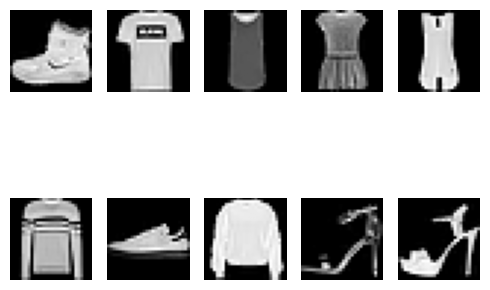

In [7]:
#2. image process
plt.figure(figsize=(5,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  img=train_images[i].reshape((28,28))
  plt.imshow(img,cmap='gray')
  plt.axis('off')
plt.tight_layout()

In [8]:
#3. mono channel reshape
train_images=train_images.reshape((-1,28,28,1))
test_images=test_images.reshape((-1,28,28,1))

In [9]:
#4. one hot encoding
train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

In [10]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [11]:
#5. data augmentation
data_augmentation=tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [12]:
#6. create cnn
def create_cnn():
  model = models.Sequential([
      data_augmentation,
      #cnn
      #layer 1
      layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      #layer 2
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      #layer 3
      layers.Conv2D(64, (3,3), activation='relu'),
      layers.BatchNormalization(),
      layers.MaxPooling2D((2,2)),

      #Flatten
      layers.Flatten(),

      #ann
      layers.Dense(128,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(10,activation='softmax'),
  ])
  return model

In [13]:
#7.model creation
model=create_cnn()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#8.model compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
#9. call backs
early_stopping=callbacks.EarlyStopping(patience=5,restore_best_weights=True)
reduce_lr=callbacks.ReduceLROnPlateau(factor=0.2,patience=3)

In [16]:
#10. train the model
history= model.fit(train_images,train_labels,
          epochs=30,
          batch_size=320,
          callbacks=[early_stopping,reduce_lr],
          validation_split=0.1)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.5247 - loss: 1.3396 - val_accuracy: 0.1623 - val_loss: 2.4126 - learning_rate: 0.0010
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7604 - loss: 0.6707 - val_accuracy: 0.4055 - val_loss: 1.4740 - learning_rate: 0.0010
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7959 - loss: 0.5761 - val_accuracy: 0.7958 - val_loss: 0.5582 - learning_rate: 0.0010
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8170 - loss: 0.5307 - val_accuracy: 0.7935 - val_loss: 0.5423 - learning_rate: 0.0010
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8247 - loss: 0.4981 - val_accuracy: 0.8007 - val_loss: 0.5423 - learning_rate: 0.0010
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8376 - loss: 0.4703 - val_accuracy: 0.8353 - val_loss: 0.4647 - learning_rate: 0.0010
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8426 - loss: 0

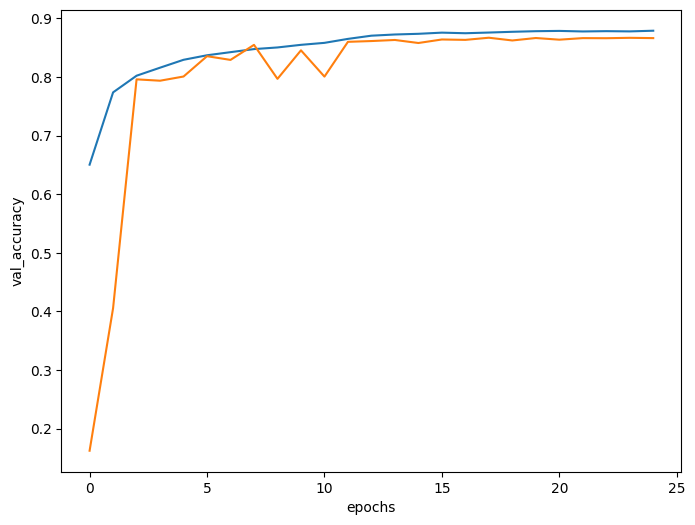

In [17]:
#11.plot the metrics
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("val_accuracy")
plt.show()

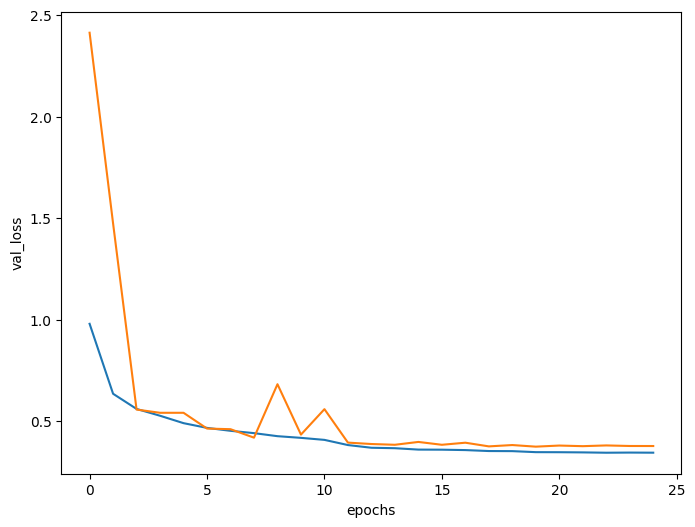

In [18]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("val_loss")
plt.show()

In [19]:
#testing
#ypred=model.predict(test_images)
#ypred

In [20]:
#print(np.argmax(ypred[1]))

In [21]:
#test_labels[1]

In [22]:
model.save('fashionmnist_cnn_model.keras')

In [23]:
from PIL import ImageOps,Image

In [24]:
def predict_img(imagepath,model):
  img = Image.open(imagepath).convert('L')#converts image into black and white
  img = ImageOps.invert(img)#inverts the image
  img = img.resize((28,28))
  img_array = np.array(img)
  img_array = img_array.astype('float32')/255
  img_array = img_array.reshape((1,28,28,1))

  predicted = model.predict(img_array)
  predicted_class = np.argmax(predicted)
  confidence = np.max(predicted)

  return predicted,predicted_class,confidence

In [25]:
def load_and_predict(image_path):
  loaded_model=tf.keras.models.load_model('fashionmnist_cnn_model.keras')
  predicted,predicted_class,confidence=predict_img(image_path,loaded_model)
  print(f"predicted: {predicted}")
  print("----------------------------------------------------")
  print(f"predicted class: {predicted_class}")
  print("----------------------------------------------------")
  print(f"confidence: {confidence}")
  print("----------------------------------------------------")
  if (predicted_class==0):
    print("T-shirt/top")
  elif(predicted_class==1):
    print("Trouser")
  elif(predicted_class==2):
    print("Pullover")
  elif(predicted_class==3):
    print("Dress")
  elif(predicted_class==4):
    print("Coat")
  elif(predicted_class==5):
    print("Sandal")
  elif(predicted_class==6):
    print("Shirt")
  elif(predicted_class==7):
    print("Sneaker")
  elif(predicted_class==8):
    print("Bag")
  elif(predicted_class==9):
    print("Ankle boots")



In [26]:
from google.colab import files
files.upload()

{}

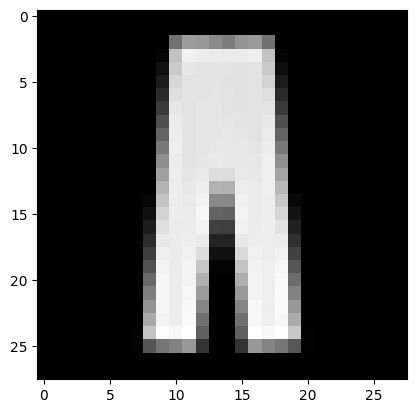

In [30]:
#image visualization
img = Image.open('/trouser.jpeg').convert('L')
img = ImageOps.invert(img)
img = img.resize((28,28))
plt.imshow(img,cmap='gray')

In [31]:
load_and_predict('/trouser.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
predicted: [[3.7939157e-07 9.9999869e-01 5.5782079e-10 8.5953644e-07 7.3377779e-09
  1.8977115e-11 7.8296289e-08 6.7909606e-12 6.3394467e-10 9.4451573e-13]]
----------------------------------------------------
predicted class: 1
----------------------------------------------------
confidence: 0.9999986886978149
----------------------------------------------------
Trouser
